# <ins>Análise de Resultados</ins>

In [111]:
import pandas as pd
import numpy as np
import psycopg2 as psql
import matplotlib.pyplot as plt
from IPython.display import display

## Conectando ao banco de dados

In [112]:
conn = psql.connect(
    host='localhost',
    database='algoritmos',
    user='postgres',
    password='ypghck52'
)

cur = conn.cursor()

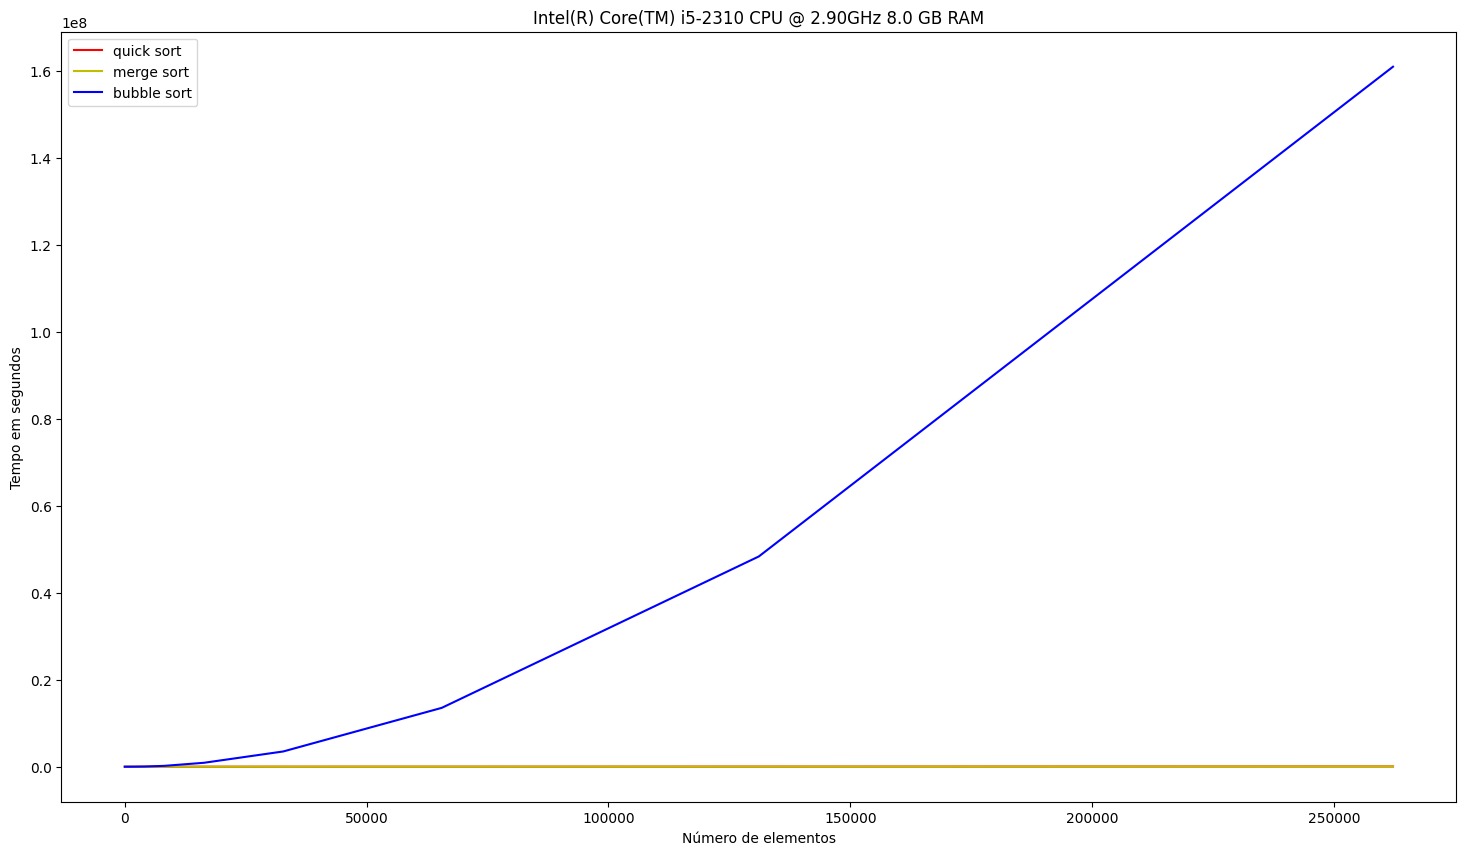

In [113]:
cur.execute('SELECT cpu, ram FROM hardware WHERE id = 1')
cpu, ram = cur.fetchone()
cur.execute('SELECT * FROM bubble(1) WHERE size > 16')

bubble_results = pd.DataFrame(cur.fetchall(), columns=[f'{cpu} {str(ram)} GB RAM', 'hardware_id', 'size', 'time1', 'time2', 'time3', 'time4', 'time5'])
bubble_results = bubble_results.drop(['hardware_id'], axis=1)
bubble_results['avg'] = bubble_results[['time1', 'time2', 'time3' , 'time4', 'time5']].mean(axis=1) 

cur.execute('SELECT * FROM merge(1) WHERE size > 16')
merge_results = pd.DataFrame(cur.fetchall(), columns=[f'{cpu} {str(ram)} GB RAM', 'hardware_id', 'size', 'time1', 'time2', 'time3', 'time4', 'time5'])
merge_results = merge_results.drop(['hardware_id'], axis=1)
merge_results['avg'] = merge_results[['time1', 'time2', 'time3' , 'time4', 'time5']].mean(axis=1) 

cur.execute('SELECT * FROM quick(1) WHERE size > 16')
quick_results = pd.DataFrame(cur.fetchall(), columns=[f'{cpu} {str(ram)} GB RAM', 'hardware_id', 'size', 'time1', 'time2', 'time3', 'time4', 'time5'])
quick_results = quick_results.drop(['hardware_id'], axis=1)
quick_results['avg'] = quick_results[['time1', 'time2', 'time3' , 'time4', 'time5']].mean(axis=1)

plt.figure(figsize=(18,10))
plt.plot(quick_results['size'].tolist(), quick_results['avg'].tolist(), 'r', label='quick sort')
plt.plot(merge_results['size'].tolist(), merge_results['avg'].tolist(), 'y', label='merge sort')
plt.plot(bubble_results['size'].tolist(), bubble_results['avg'].tolist(), 'b', label='bubble sort')
plt.xlabel('Número de elementos')
plt.ylabel('Tempo em segundos')
plt.title(f'{cpu} {str(ram)} GB RAM')
plt.legend()
plt.show()

## Lembrando:

* merge Sort: $O(n^2)$
* merge Sort: $O(n*log(n))$ - em média
* merge Sort: $O(n*log(n))$ - para os piores casos

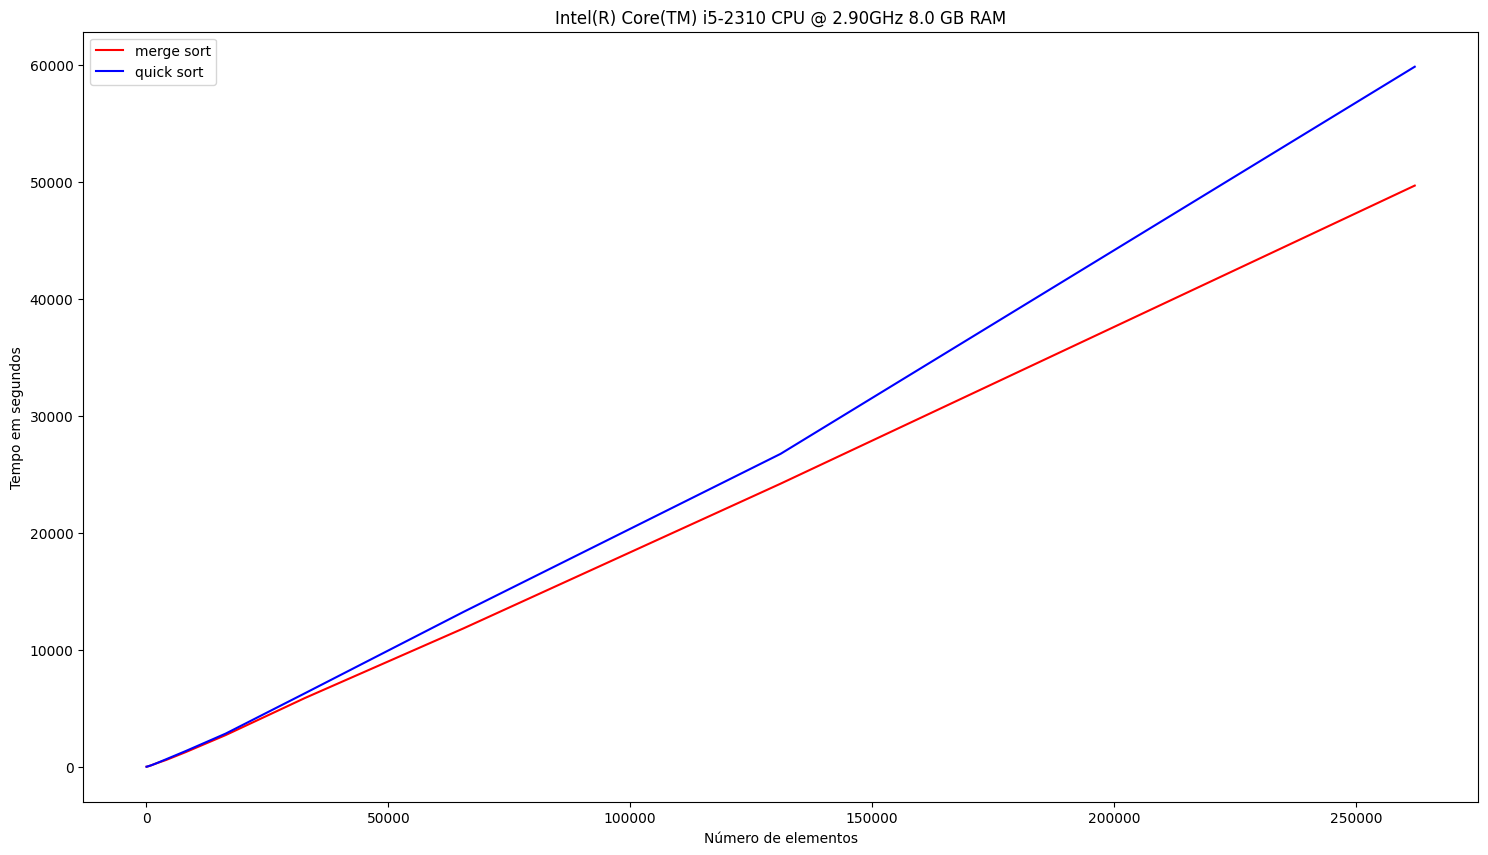

In [114]:
plt.figure(figsize=(18,10))
plt.plot(merge_results['size'].tolist(), merge_results['avg'].tolist(), 'r', label='merge sort')
plt.plot(quick_results['size'].tolist(), quick_results['avg'].tolist(), 'b', label='quick sort')
plt.xlabel('Número de elementos')
plt.ylabel('Tempo em segundos')
plt.title(f'{cpu} {str(ram)} GB RAM')
plt.legend()
plt.show()

## Podemos ver claramente que o merge Sort começa a tender para um comportamento $O(n^2)$. O merge Sort acaba sendo a melhor opção.

## Agora, calculando os intervalos de confiança e seus respectivos valores relativos (porcentagem da média), e plotando no gráfico.

,avg,intervalo_conf,porc_conf
0,2.20,0.96,43.65
1,5.20,1.44,27.70
2,11.20,1.90,16.97
3,24.80,2.93,11.83
4,58.20,8.26,14.18
5,125.40,8.31,6.62
6,289.80,42.16,14.55
7,582.40,16.24,2.79
8,1262.80,11.25,0.89
9,2708.00,49.10,1.81


,avg,intervalo_conf,porc_conf
0,3.20,0.96,30.01
1,9.80,3.42,34.87
2,10.60,2.74,25.89
3,22.60,4.37,19.31
4,41.40,3.14,7.57
5,87.00,9.80,11.26
6,249.00,49.60,19.92
7,393.00,9.88,2.51
8,856.40,5.90,0.69
9,1843.00,21.57,1.17


,avg,intervalo_conf,porc_conf
0,2.00,1.52,75.91
1,4.60,1.82,39.51
2,11.00,2.97,27.02
3,152.60,218.98,143.50
4,55.20,2.27,4.11
5,117.00,7.62,6.51
6,255.00,13.90,5.45
7,572.40,12.09,2.11
8,1191.20,32.49,2.73
9,2538.80,20.08,0.79


,avg,intervalo_conf,porc_conf
0,1.80,0.73,40.74
1,3.00,1.52,50.61
2,6.00,1.75,29.22
3,16.20,2.09,12.92
4,38.80,2.93,7.56
5,87.80,4.08,4.65
6,194.60,7.81,4.01
7,418.20,4.70,1.12
8,965.00,74.70,7.74
9,1950.80,22.69,1.16


,avg,intervalo_conf,porc_conf
0,0.80,0.73,91.67
1,1.80,0.73,40.74
2,3.40,1.33,39.10
3,6.80,2.18,32.10
4,16.00,4.16,25.99
5,35.20,8.75,24.86
6,81.60,19.41,23.79
7,209.60,14.38,6.86
8,505.40,8.76,1.73
9,1079.40,15.88,1.47


,avg,intervalo_conf,porc_conf
0,1.20,0.96,80.02
1,2.00,0.62,30.99
2,4.20,1.57,37.33
3,10.40,5.24,50.43
4,20.20,5.27,26.11
5,60.00,8.48,14.13
6,188.20,96.75,51.41
7,298.40,8.33,2.79
8,678.40,3.01,0.44
9,1590.60,134.69,8.47


,avg,intervalo_conf,porc_conf
0,1.40,0.78,56.00
1,2.80,1.14,40.82
2,7.40,1.82,24.56
3,14.00,2.63,18.78
4,32.20,4.40,13.67
5,77.20,4.36,5.64
6,176.00,5.47,3.11
7,382.20,6.39,1.67
8,848.00,18.78,2.21
9,1743.20,92.12,5.28


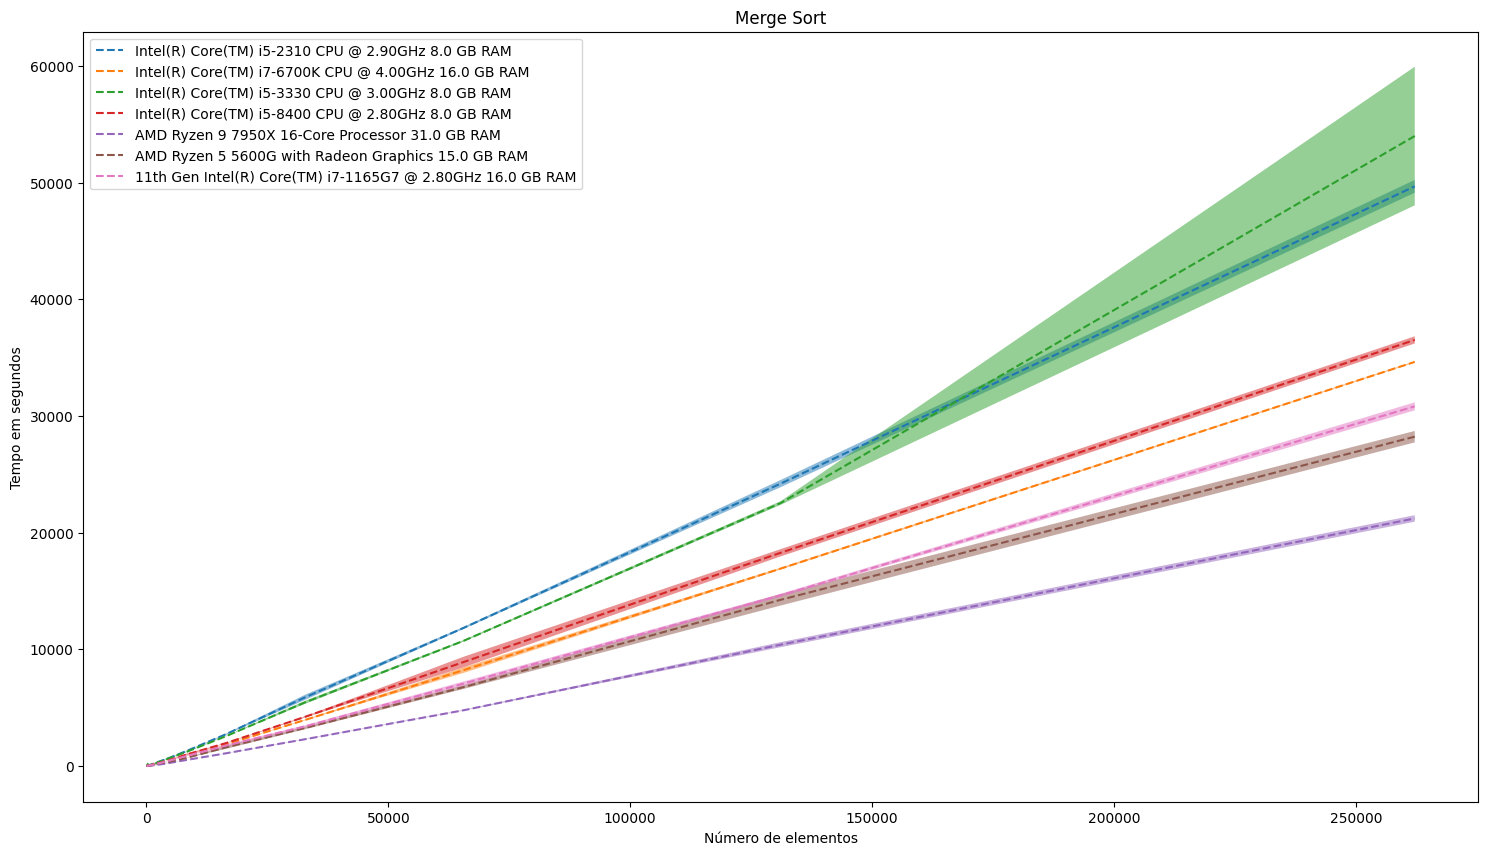

In [115]:
pd.options.display.float_format = '{:.2f}'.format
cur.execute('SELECT cpu, ram FROM hardware')
plt.figure(figsize=(18,10))
for cpu, ram in cur.fetchall():
    cur.execute(f"SELECT id FROM hardware WHERE cpu='{cpu}' AND ram={ram}")
    hardware_id = cur.fetchone()[0]
    cur.execute(f'SELECT * FROM merge({hardware_id}) WHERE size > 16')
    merge_results = pd.DataFrame(cur.fetchall(), columns=[f'{cpu} {str(ram)} GB RAM', 'hardware_id', 'size', 'time1', 'time2', 'time3', 'time4', 'time5'])
    merge_results['avg'] = merge_results[['time1', 'time2', 'time3' , 'time4', 'time5']].mean(axis=1) 
    merge_results['desv_pad'] = merge_results[['time1', 'time2', 'time3' , 'time4', 'time5']].std(axis=1, ddof=1) 
    merge_results['intervalo_conf'] = 1.96*(merge_results['desv_pad']/np.sqrt(5))
    merge_results['porc_conf'] = merge_results['intervalo_conf']*100/merge_results['avg']
    # display(merge_results)
    plt.plot(merge_results['size'].tolist(), merge_results['avg'].tolist(), '--', label=f'{cpu} {ram} GB RAM')
    plt.fill_between(merge_results['size'].tolist(), (merge_results['avg'] - merge_results['intervalo_conf']).tolist(), (merge_results['avg'] + merge_results['intervalo_conf']).tolist(), alpha=0.5)
    plt.title('Merge Sort')
    display(merge_results[['avg', 'intervalo_conf', 'porc_conf']])
    
plt.xlabel('Número de elementos')
plt.ylabel('Tempo em segundos')
plt.legend()
# plt.xlim([0,8000])
# plt.ylim([0,2000])
plt.show()

## Podemos ver as diferenças de tempo de execução em cada tipo de hardware.

,avg,intervalo_conf,porc_conf
0,2.20,0.39,17.82
1,4.20,1.14,27.21
2,10.80,0.96,8.89
3,27.00,1.39,5.13
4,57.60,1.33,2.31
5,129.60,1.47,1.13
6,292.80,2.66,0.91
7,644.20,21.55,3.34
8,1354.00,21.37,1.58
9,2833.80,13.11,0.46


,avg,intervalo_conf,porc_conf
0,1.20,0.39,32.67
1,3.80,0.73,19.30
2,6.60,1.00,15.14
3,15.80,0.96,6.08
4,35.00,1.39,3.96
5,76.00,2.56,3.36
6,253.20,56.51,22.32
7,376.60,2.45,0.65
8,815.60,8.28,1.02
9,1750.20,5.96,0.34


,avg,intervalo_conf,porc_conf
0,1.80,0.73,40.74
1,3.40,1.00,29.39
2,8.20,3.12,38.09
3,20.60,1.82,8.82
4,51.00,0.88,1.72
5,111.20,1.69,1.52
6,240.20,2.51,1.04
7,554.40,20.19,3.64
8,1138.60,1.82,0.16
9,2564.00,25.13,0.98


,avg,intervalo_conf,porc_conf
0,1.20,0.39,32.67
1,2.60,0.78,30.15
2,5.40,1.71,31.64
3,14.00,2.23,15.96
4,35.40,2.37,6.69
5,91.60,9.63,10.52
6,186.60,2.81,1.51
7,421.40,11.93,2.83
8,949.40,50.01,5.27
9,2013.20,13.39,0.66


,avg,intervalo_conf,porc_conf
0,0.80,0.39,49.00
1,1.20,0.39,32.67
2,3.00,1.07,35.78
3,6.20,1.90,30.65
4,13.80,3.69,26.72
5,28.80,8.39,29.14
6,66.20,16.19,24.46
7,180.00,18.12,10.07
8,445.00,5.98,1.34
9,977.00,15.23,1.56


,avg,intervalo_conf,porc_conf
0,0.80,0.39,49.00
1,1.60,0.78,49.00
2,3.00,1.52,50.61
3,6.80,2.66,39.10
4,16.00,4.92,30.75
5,47.40,8.51,17.96
6,102.40,12.00,11.71
7,256.40,31.22,12.17
8,547.20,11.28,2.06
9,1346.00,101.64,7.55


,avg,intervalo_conf,porc_conf
0,0.60,0.48,80.02
1,2.00,1.07,53.68
2,4.00,1.52,37.96
3,9.40,3.70,39.34
4,26.60,4.32,16.24
5,71.60,5.49,7.67
6,149.60,5.06,3.38
7,337.60,5.49,1.63
8,719.40,7.24,1.01
9,1357.60,7.71,0.57


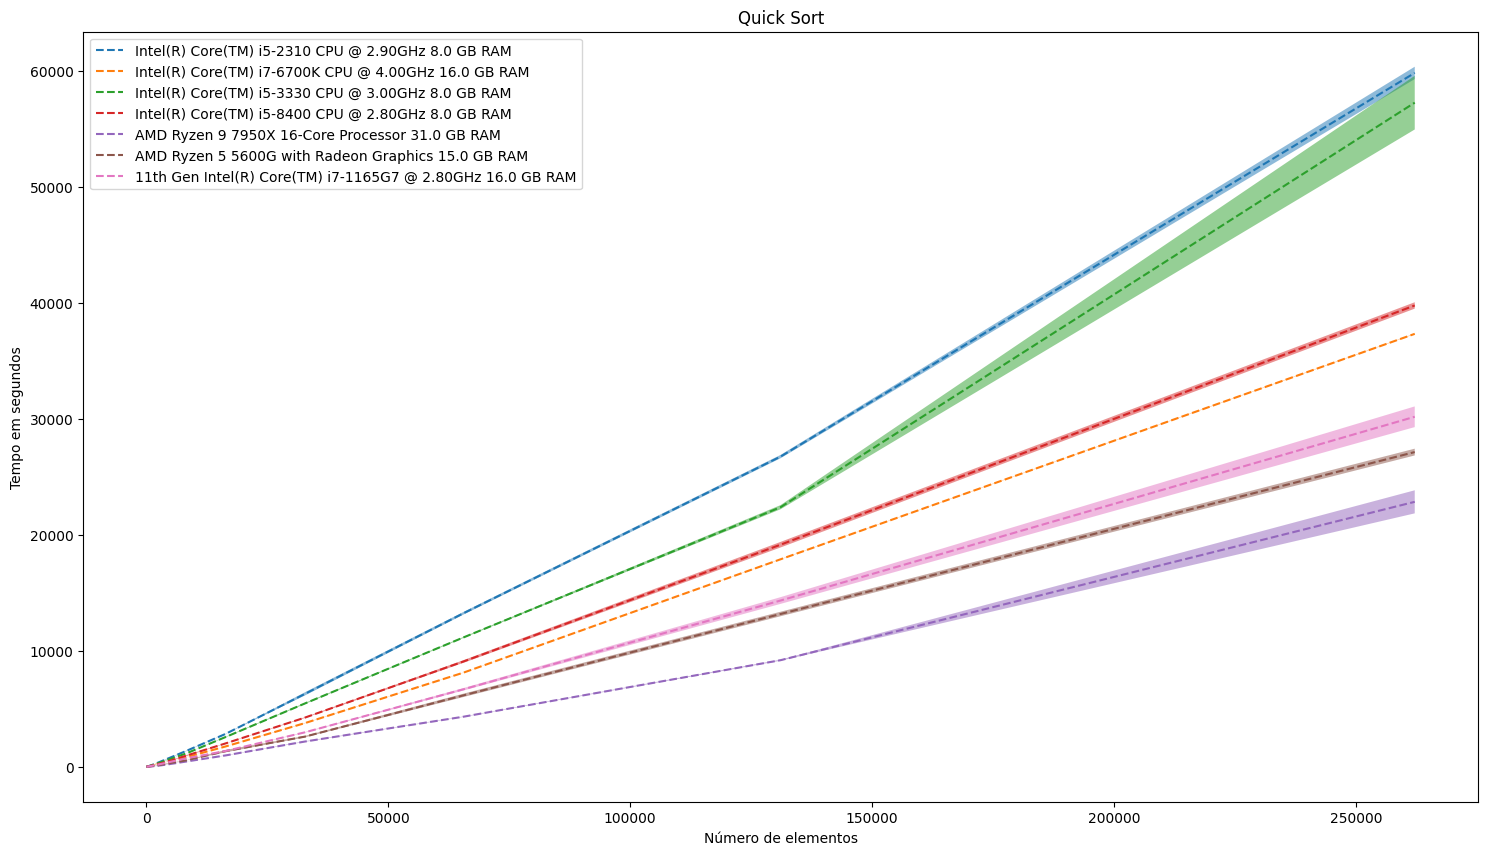

In [116]:
cur.execute('SELECT cpu, ram FROM hardware')
plt.figure(figsize=(18,10))
for cpu, ram in cur.fetchall():
    cur.execute(f"SELECT id FROM hardware WHERE cpu='{cpu}' AND ram={ram}")
    hardware_id = cur.fetchone()[0]
    cur.execute(f'SELECT * FROM quick({hardware_id}) WHERE size > 16')
    quick_results = pd.DataFrame(cur.fetchall(), columns=[f'{cpu} {str(ram)} GB RAM', 'hardware_id', 'size', 'time1', 'time2', 'time3', 'time4', 'time5'])
    quick_results['avg'] = quick_results[['time1', 'time2', 'time3' , 'time4', 'time5']].mean(axis=1) 
    quick_results['desv_pad'] = quick_results[['time1', 'time2', 'time3' , 'time4', 'time5']].std(axis=1, ddof=1) 
    quick_results['intervalo_conf'] = 1.96*(quick_results['desv_pad']/np.sqrt(5))
    quick_results['porc_conf'] = quick_results['intervalo_conf']*100/quick_results['avg']
    plt.plot(quick_results['size'].tolist(), quick_results['avg'].tolist(), '--', label=f'{cpu} {ram} GB RAM')
    plt.fill_between(quick_results['size'].tolist(), (quick_results['avg'] - quick_results['intervalo_conf']).tolist(), (quick_results['avg'] + quick_results['intervalo_conf']).tolist(), alpha=0.5)
    plt.title('Quick Sort')
    display(quick_results[['avg', 'intervalo_conf', 'porc_conf']])
    
plt.xlabel('Número de elementos')
plt.ylabel('Tempo em segundos')
plt.legend()
# plt.xlim([0,8000])
# plt.ylim([0,2000])
plt.show()

,avg,intervalo_conf,porc_conf
0,4.00,0.00,0.00
1,12.60,0.48,3.81
2,47.00,0.88,1.86
3,173.00,2.63,1.52
4,659.80,56.66,8.59
5,2574.60,28.16,1.09
6,10334.40,133.66,1.29
7,43489.20,254.23,0.58
8,200275.40,1235.74,0.62
9,904533.20,67277.67,7.44


,avg,intervalo_conf,porc_conf
0,2.80,0.39,14.00
1,11.60,1.00,8.62
2,35.40,2.74,7.75
3,142.80,12.81,8.97
4,461.40,64.29,13.93
5,1998.20,337.89,16.91
6,8474.60,1110.17,13.10
7,28815.00,683.54,2.37
8,130253.20,259.19,0.20
9,598253.40,10172.06,1.70


,avg,intervalo_conf,porc_conf
0,3.40,0.48,14.12
1,11.60,1.47,12.64
2,41.80,1.30,3.11
3,165.80,1.90,1.15
4,610.60,5.13,0.84
5,2363.20,39.45,1.67
6,9407.80,274.53,2.92
7,40133.00,668.48,1.67
8,191406.20,1770.20,0.92
9,824419.60,10510.74,1.27


,avg,intervalo_conf,porc_conf
0,2.60,0.48,18.47
1,7.00,0.62,8.85
2,30.20,1.30,4.31
3,118.20,0.39,0.33
4,434.40,3.07,0.71
5,1743.00,159.62,9.16
6,7284.00,760.59,10.44
7,32437.00,1596.99,4.92
8,146692.20,988.40,0.67
9,633130.20,8469.57,1.34


,avg,intervalo_conf,porc_conf
0,0.80,0.39,49.00
1,5.00,0.62,12.40
2,16.60,3.20,19.26
3,54.40,2.53,4.64
4,193.40,5.06,2.62
5,793.20,8.62,1.09
6,3084.40,73.79,2.39
7,12093.00,330.16,2.73
8,49898.60,1490.71,2.99
9,189298.40,2302.84,1.22


,avg,intervalo_conf,porc_conf
0,1.80,0.39,21.78
1,7.60,1.18,15.47
2,19.20,1.14,5.95
3,74.80,19.40,25.93
4,273.40,39.65,14.50
5,1050.80,5.79,0.55
6,3817.80,93.09,2.44
7,15679.80,761.68,4.86
8,62065.20,2846.66,4.59
9,284732.40,4329.22,1.52


,avg,intervalo_conf,porc_conf
0,2.20,0.39,17.82
1,8.60,1.47,17.05
2,25.40,2.67,10.52
3,100.60,1.82,1.81
4,383.00,2.84,0.74
5,1538.00,65.97,4.29
6,5705.20,43.64,0.76
7,23395.40,1041.42,4.45
8,82640.80,4473.74,5.41
9,420642.60,7085.81,1.68


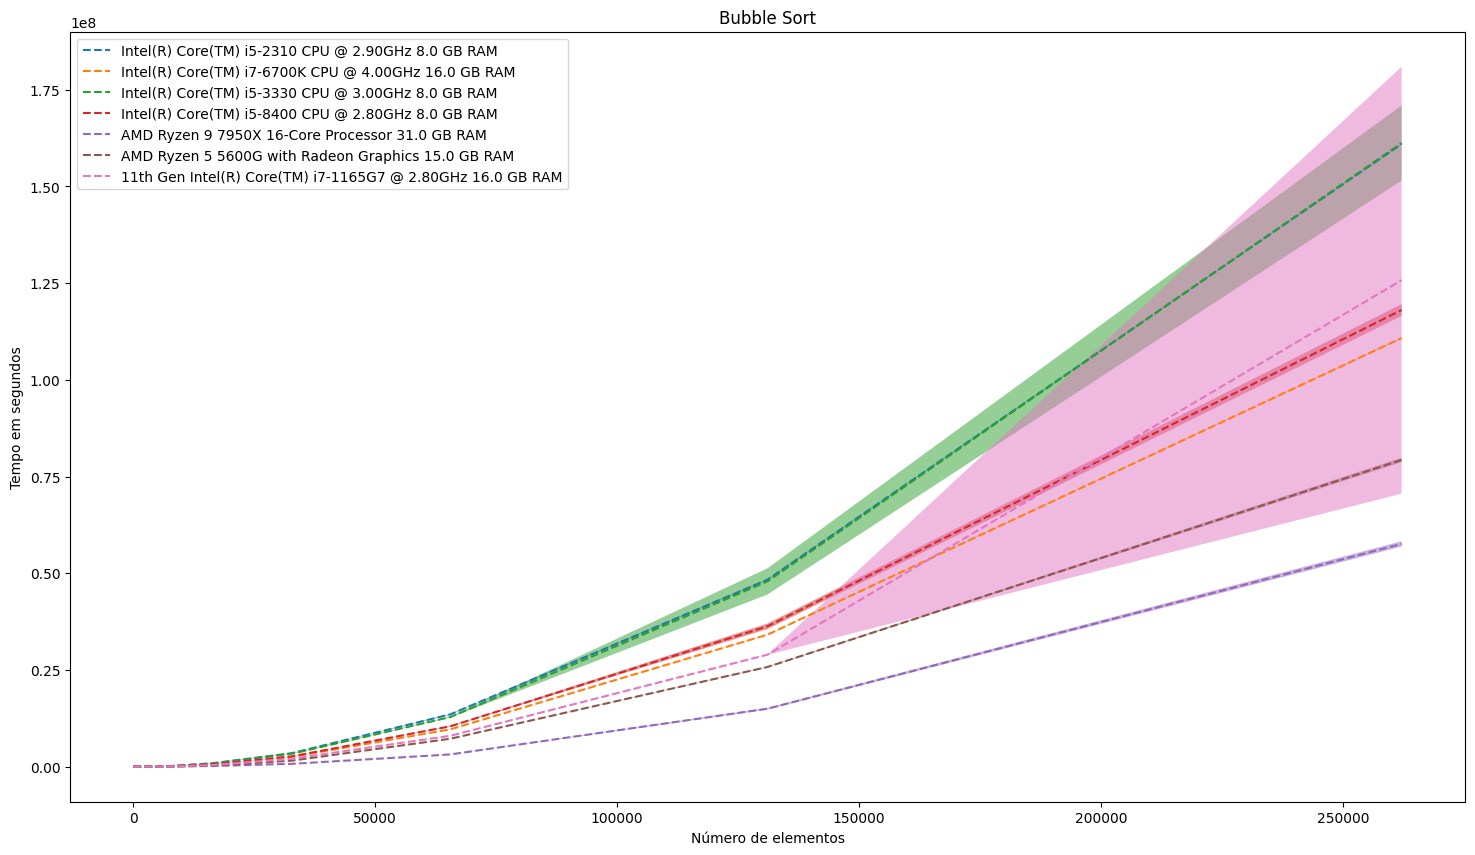

In [117]:
cur.execute('SELECT cpu, ram FROM hardware')
plt.figure(figsize=(18,10))
for cpu, ram in cur.fetchall():
    cur.execute(f"SELECT id FROM hardware WHERE cpu='{cpu}' AND ram={ram}")
    hardware_id = cur.fetchone()[0]
    cur.execute(f'SELECT * FROM bubble({hardware_id}) WHERE size > 16')
    bubble_results = pd.DataFrame(cur.fetchall(), columns=[f'{cpu} {str(ram)} GB RAM', 'hardware_id', 'size', 'time1', 'time2', 'time3', 'time4', 'time5'])
    bubble_results['avg'] = bubble_results[['time1', 'time2', 'time3' , 'time4', 'time5']].mean(axis=1) 
    bubble_results['desv_pad'] = bubble_results[['time1', 'time2', 'time3' , 'time4', 'time5']].std(axis=1, ddof=1)
    bubble_results['intervalo_conf'] = 1.96*(bubble_results['desv_pad']/np.sqrt(5))
    bubble_results['porc_conf'] = bubble_results['intervalo_conf']*100/bubble_results['avg']
    plt.plot(bubble_results['size'].tolist(), bubble_results['avg'].tolist(), '--', label=f'{cpu} {ram} GB RAM')
    plt.fill_between(bubble_results['size'].tolist(), (bubble_results['avg'] - bubble_results['intervalo_conf']).tolist(), (bubble_results['avg'] + bubble_results['intervalo_conf']).tolist(), alpha=0.5)
    plt.title('Bubble Sort')
    display(bubble_results[['avg', 'intervalo_conf', 'porc_conf']])
    
plt.xlabel('Número de elementos')
plt.ylabel('Tempo em segundos')
plt.legend()
# plt.xlim([0,8000])
# plt.ylim([0,200000])
plt.show()